# Unit manipulation for Brown+COSMOS templates
If values of template fluxes are too small, they vanishes when they are squared. To avoid this, we can adjust the values of template fluxes by multiplying them by a constant factor. This way, we can make the values of template fluxes larger and avoid the vanishing problem.

In addition to that, the base unit of the Brown template and the COSMOS template are different.
We will match these two templates by converting the base unit of the Brown template to the base unit of the COSMOS template.

In [130]:
import os
from pathlib import Path
import pickle
import numpy as np
import gc
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
import eazy

from matplotlib import rcParams
plt.rcParams["font.size"] = 15
plt.rcParams["axes.labelsize"] = 20

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/challenge')
os.chdir(WD)

TEMPDIR = Path('/data1/hbahk/spherex-photoz/spherex-challenge/BROWN_COSMOS')
brownlist = list(TEMPDIR.glob('*.dat'))
cosmoslist = list(TEMPDIR.glob('*.sed'))

OUTTEMPDIR = WD/'templates'
if not OUTTEMPDIR.exists():
    OUTTEMPDIR.mkdir()

In [121]:
print(f'number of brown: {len(brownlist)}')
print(f'number of cosmos: {len(cosmoslist)}')

number of brown: 129
number of cosmos: 31


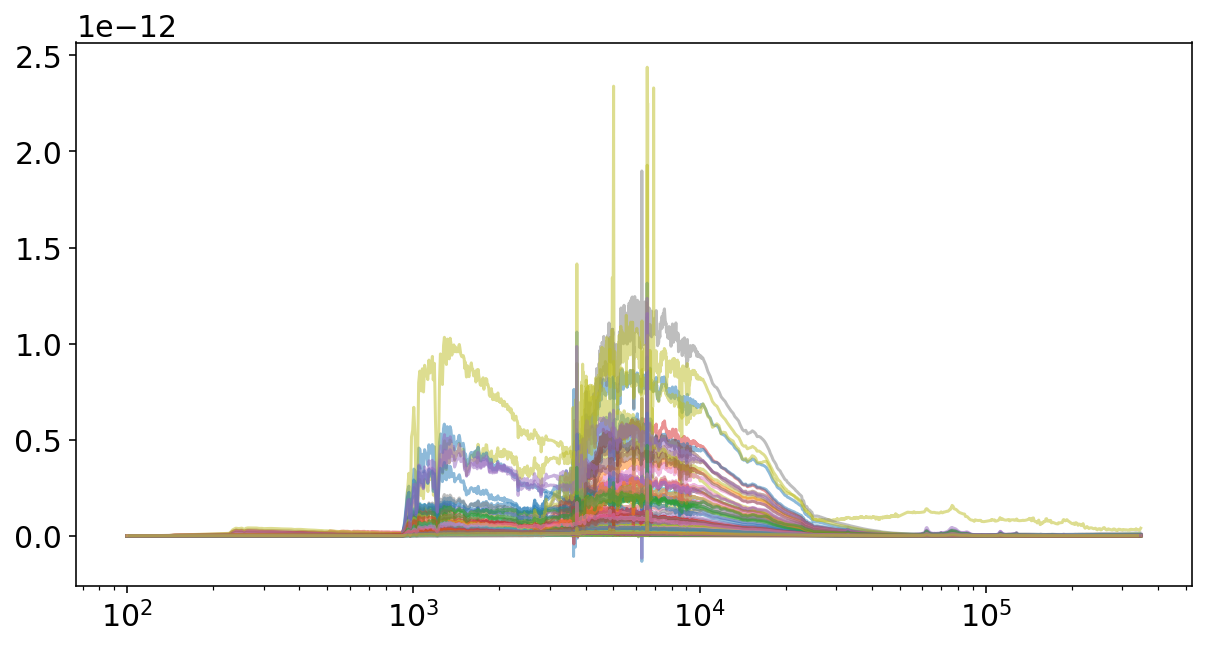

In [123]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
for tempfile in brownlist:
    temp = Table.read(tempfile, format='ascii.no_header', names=['wave', 'flux'])
    ax.plot(temp['wave'], temp['flux'], alpha=0.5)
ax.set_xscale('log')

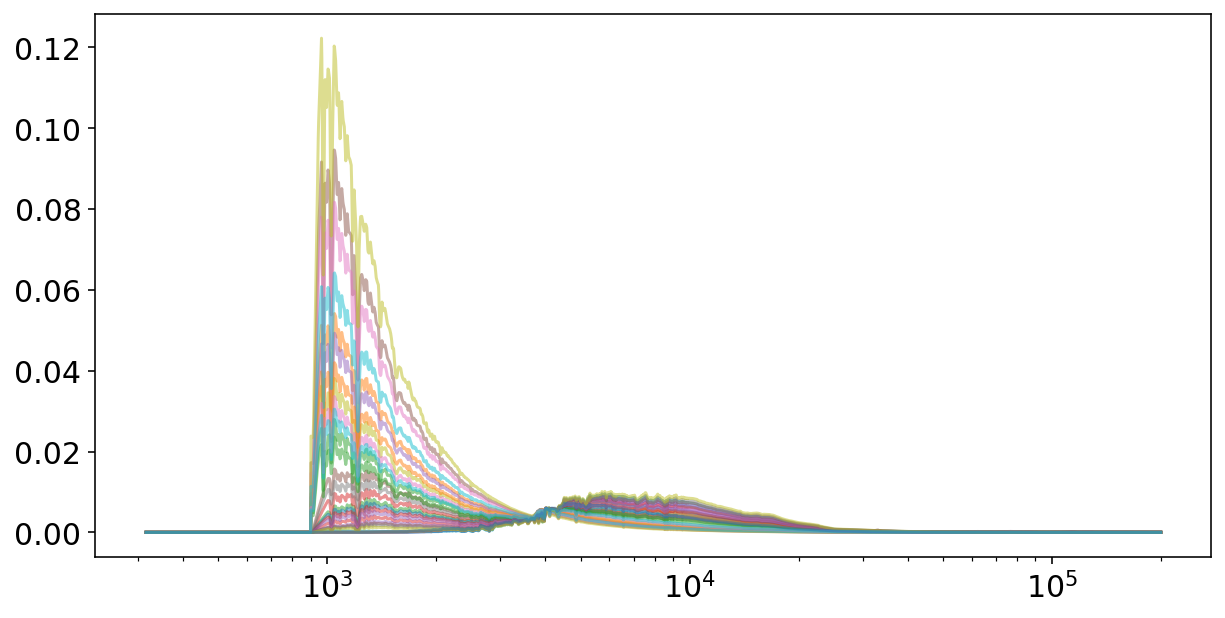

In [124]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
for tempfile in cosmoslist:
    temp = Table.read(tempfile, format='ascii.no_header', names=['wave', 'flux'])
    ax.plot(temp['wave'], temp['flux'], alpha=0.5)
ax.set_xscale('log')

In [131]:
for tempfile in brownlist:
    temp = Table.read(tempfile, format='ascii.no_header', names=['wave', 'flux'])
    temp['flux'] *= 1e17
    temp.write(OUTTEMPDIR/f'{tempfile.stem}.sed', overwrite=True, format='ascii.no_header')
    
for tempfile in cosmoslist:
    temp = Table.read(tempfile, format='ascii.no_header', names=['wave', 'flux'])
    temp.write(OUTTEMPDIR/f'{tempfile.stem}.sed', overwrite=True, format='ascii.no_header')

In [132]:
templist = list(OUTTEMPDIR.glob('*.sed'))
print(f'number of templates: {len(templist)}')

number of templates: 160


# Make template list file

In [137]:
templist.sort()
temptab = Table((np.arange(len(templist))+1,
                 [f'./{OUTTEMPDIR.name}/{t.name}' for t in templist]),
                names=['id', 'name'])
temptab[:5]

id,name
int64,str36
1,./templates/Arp_118_spec.sed
2,./templates/Arp_256_N_spec.sed
3,./templates/Arp_256_S_spec.sed
4,./templates/CGCG_049-057_spec.sed
5,./templates/CGCG_436-030_spec.sed


In [ ]:
temptab.write(WD/'spherex_brown_cosmos.templates', format='ascii.no_header', overwrite=True)